<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Enginerring_using_keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 24th Oct, 2021
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
#
#####################################
# Engineering with NN architecture
# Using keras functional API 
#####################################

# Functional Models
See this [an excellent article](https://keras.io/guides/functional_api/) on Functional Modeling<br><br>
The Keras functional API is a way to create models that are more flexible than the Sequential API. The functional API can handle models with non-linear sequence, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a graph  of layers. So the functional API is a way to build graphs of layers.

In [ ]:
# 1.0 Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.1 Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 1.3 Mount google drive as /gdrive
#     directly under root:

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

In [ ]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

In [ ]:
# 2.1.1
X.shape
y.shape

In [ ]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# 2.3 Show data field names
#print(housing.DESCR)
#housing.feature_names

In [ ]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

## Our models<br>
We will construct the following three models:

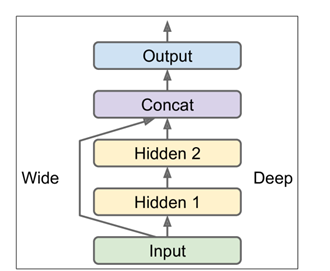

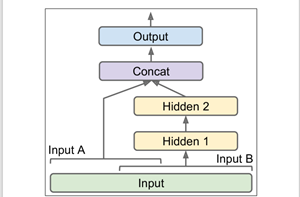

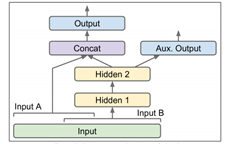

## Wide and Deep Network--Ist version

### Inputs
<i>Input()</i> is used to instantiate a Keras tensor.
Inputs is the shape of each object. In a tabular data, each row is an object. In Image data, each image is an object. So, in the former case, it is one dimensional and in the later case two-dimensional.
```
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)
```

In [ ]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
#       Input() is used to instantiate a Keras tensor.
#       This tensor will get populated when .fit() is
#       invoked and data starts flowing in:

inputs = tf.keras.Input(shape = X.shape[1], batch_size=None)
type(inputs)

keras.engine.keras_tensor.KerasTensor

In [ ]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 8)
input_3


In [ ]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [ ]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )  # (None, 100)

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [ ]:
# 3.2.2 Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [ ]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [ ]:
# 3.3.1
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)

# 3.3.1 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [ ]:
# 3.4 Print model summary
model.summary()

In [ ]:
# 3.5 `Model` groups layers into an object 
#       with training and inference features.
help(Model)

In [ ]:
# 3.6 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [ ]:
# 3.7 Compile model
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

In [ ]:
# 3.8 
model.evaluate(X_test,y_test)  # 2.56280517578125

129/129 [==============================] - 0s 2ms/step - loss: 2.5722


2.572161912918091

## Wide and Deep Network--Convolution Network

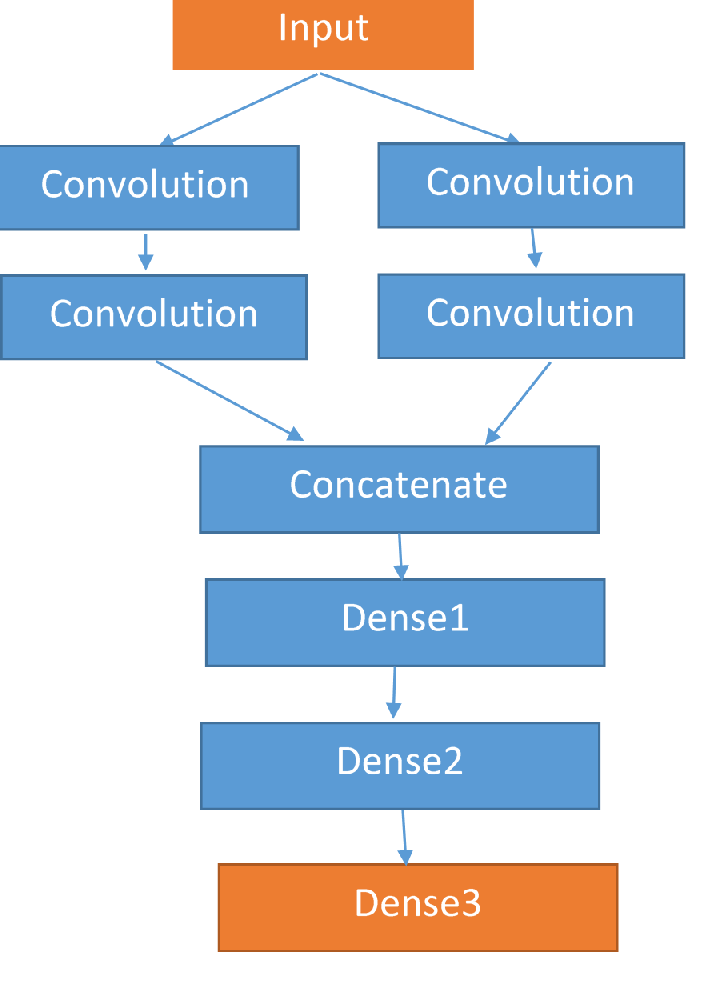

In [ ]:
# 4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # Each row is one sample: 7705
input_features = X_train.shape[1]               # No of features: 178
channels = 1
batch_size_tr = no_of_samples_tr                # Data being less, we will
                                                # use all samples in the batch

In [ ]:
# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 3795
input_features = X_test.shape[1]               # No of features. 178
channels = 1
batch_size_test = no_of_samples_test           # 3795

In [ ]:
# 4.3 Reshape input train/test data as required by Keras for conv1D
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [ ]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(shape = (X.shape[1],1))


In [ ]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [ ]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(filters = 64, kernel_size=3,activation='relu')(inputs)

# 5.3.1
x_rt = layers.Conv1D(filters = 128, kernel_size=3,activation='relu')(x_rt)


In [ ]:
# 5.4 Concatenate layers & Flatten:

x = tf.keras.layers.concatenate([x_left,x_rt])
x = layers.Flatten()(x)

In [ ]:
# 5.5 Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [ ]:
# 5.6 Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [ ]:
# 5.7 Create model now
model1 = Model(inputs = [inputs], outputs = [out])

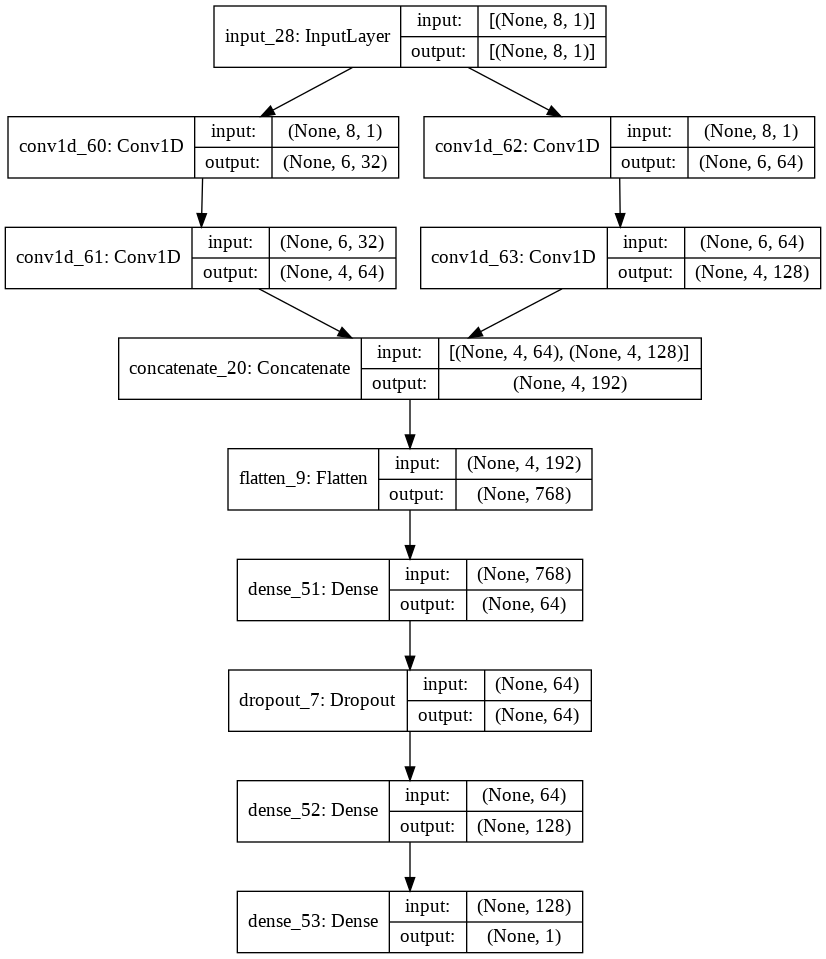

In [ ]:
# 5.8 Display model now

plot_model(model1, show_shapes= True)

In [ ]:
# 5.8 Compile model

model1.compile(loss = "mean_squared_error", optimizer='adam')  
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

In [ ]:
# 5.9 
model1.evaluate(test,y_test)  

## Wide and Deep Network--IInd version

In [ ]:
# 6.0 We have two inputs
inputsA = tf.keras.Input(shape = X_train[:,:4].shape[1:])
inputsB = tf.keras.Input(shape = X_train[:,1:8].shape[1:])

In [ ]:
# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)


In [ ]:
# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)


In [ ]:
# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

In [ ]:
# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)


In [ ]:
# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])
model2.summary()

In [ ]:
# 6.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     Note the two train inputs
model2.fit(
            [X_train[:,:4], X_train[:,1:8]],
            y_train,
            epochs = 100
           )

In [ ]:
# 6.7 
model2.evaluate( [X_test[:,:4], X_test[:,1:8]],y_test)  

129/129 [==============================] - 0s 2ms/step - loss: 2.5633


2.563317060470581

In [ ]:
# 6.8 Plot our model
plot_model(model2)

## Two inputs and two outputs model--IIIrd ver

In [ ]:
# 7.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 7.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 7.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 7.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 7.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 7.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


In [ ]:
# 7.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [ ]:
# 8.0 Compile model now
# Ref: Model.compile: 
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [ ]:
# 8.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               [y_train,y_train],
               epochs = 100
           )

In [ ]:
# 8.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

In [ ]:
# 8.3 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

129/129 [==============================] - 0s 1ms/step - loss: 2.5633 - out_a_loss: 2.5632 - out_b_loss: 2.5639 - out_a_mse: 2.5632 - out_b_mse: 2.5639


[2.5633063316345215,
 2.563241958618164,
 2.563885450363159,
 2.563241958618164,
 2.563885450363159]

In [ ]:
########### It is done ##############